# Two Questions

1. What're the Airbnb listing vibes in different areas in Boston and Seattle?
2. Are there common trends in both cities, and what're the significant difference in terms of airbnb listings?

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import geopandas as gpd

#import datasets
bos_calendar = pd.read_csv('boston/calendar.csv')
bos_listing = pd.read_csv('boston/listings.csv')
bos_review = pd.read_csv('boston/reviews.csv')
sea_calendar = pd.read_csv('seattle/calendar.csv')
sea_listing = pd.read_csv('seattle/listings.csv')
sea_review = pd.read_csv('seattle/reviews.csv')
seattle_neighborhoods = gpd.read_file('seattle/seattle_neighborhoods.geojson')
boston_neighborhoods = gpd.read_file('boston/boston_neighborhoods.geojson')

## Data Understanding - Calendar

In [26]:
bos_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [24]:
bos_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [25]:
# only price columns has missing values

In [27]:
bos_calendar[bos_calendar.price.notnull()].head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00


In [28]:
# price column needed clean, transfer to numerical variable

In [43]:
bos_calendar.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [46]:
def priceClean(s):
    if pd.isnull(s):
        return None
    else:
        return float(s.replace(",","").replace("$",""))

bos_calendar['price_cleansed'] = bos_calendar['price'].apply(priceClean)

In [47]:
def is_decimal(f):
    if pd.isnull(f):
        return None
    return not f.is_integer()

bos_calendar['price_cleansed'].apply(is_decimal).sum()

0

In [31]:
# no decimal in boston calendar, check seattle calendar

In [48]:
sea_calendar['price'].apply(priceClean).apply(is_decimal).sum()

0

In [33]:
# no decimal in both data sets, can convert price column to integer directly

In [49]:
def priceClean(s):
    '''
    clean @price column, convert from $50.00 to Int type 50
    '''
    if pd.isnull(s):
        return None
    else:
        return int(float(s.replace(",","").replace("$","")))

In [50]:
bos_calendar['price_cleansed'] = bos_calendar['price'].apply(priceClean)
bos_calendar['price_cleansed'] = bos_calendar.price_cleansed.astype('Int64')

In [51]:
bos_calendar.describe()

,listing_id,price_cleansed
count,1.308890e+06,643037.0
mean,8.442118e+06,198.438909
std,4.500149e+06,180.142913
min,3.353000e+03,11.0
25%,4.679319e+06,85.0
50%,8.578710e+06,150.0
75%,1.279603e+07,255.0
max,1.493346e+07,7163.0


/Users/yuxiangqin/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/yuxiangqin/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


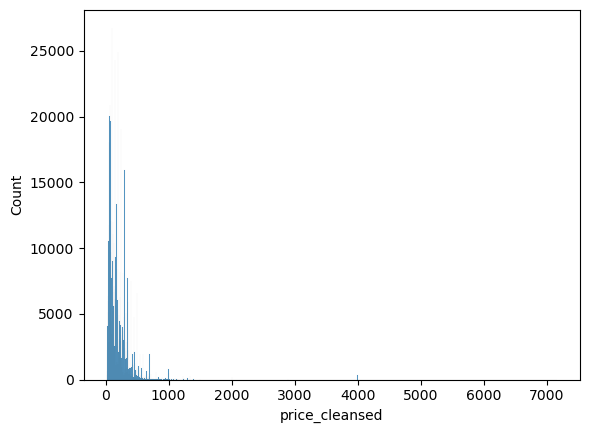

In [54]:
sns.histplot(bos_calendar[bos_calendar.price_cleansed.notnull()]['price_cleansed']);

In [58]:
bos_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   listing_id      1308890 non-null  int64 
 1   date            1308890 non-null  object
 2   available       1308890 non-null  object
 3   price           643037 non-null   object
 4   price_cleansed  643037 non-null   Int64 
dtypes: Int64(1), int64(1), object(3)
memory usage: 51.2+ MB


In [59]:
# date column is string, need to extract year month day information
# write a function to clean calendar data

In [61]:
def calendarClean(df):
    # clean [date] column
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    # clean [price] column
    df['price_cleansed'] = df['price'].apply(priceClean)
    df['price_cleansed'] = df.price_cleansed.astype('Int64')

In [62]:
calendarClean(sea_calendar)
calendarClean(bos_calendar)

In [63]:
sea_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   listing_id      1393570 non-null  int64         
 1   date            1393570 non-null  datetime64[ns]
 2   available       1393570 non-null  object        
 3   price           934542 non-null   object        
 4   year            1393570 non-null  int64         
 5   month           1393570 non-null  int64         
 6   day             1393570 non-null  int64         
 7   price_cleansed  934542 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(4), object(2)
memory usage: 86.4+ MB


In [64]:
bos_calendar.year.value_counts()

2017    889328
2016    419562
Name: year, dtype: int64

In [65]:
sea_calendar.year.value_counts()

2016    1385934
2017       7636
Name: year, dtype: int64

In [49]:
# notice date range for 2 cities are not distributed same way, but both between 2016-2017 period

In [66]:
bos_calendar.groupby(['year','month'])['listing_id'].count()

year  month
2016  9         89650
      10       111166
      11       107580
      12       111166
2017  1        111166
      2        100408
      3        111166
      4        107580
      5        111166
      6        107580
      7        111166
      8        111166
      9         17930
Name: listing_id, dtype: int64

In [67]:
bos_calendar.groupby(['year','month'])['listing_id'].nunique()

year  month
2016  9        3585
      10       3585
      11       3585
      12       3585
2017  1        3585
      2        3585
      3        3585
      4        3585
      5        3585
      6        3585
      7        3585
      8        3585
      9        3585
Name: listing_id, dtype: int64

In [68]:
sea_calendar.groupby(['year','month'])['listing_id'].count()

year  month
2016  1        106904
      2        110722
      3        118358
      4        114540
      5        118358
      6        114540
      7        118358
      8        118358
      9        114540
      10       118358
      11       114540
      12       118358
2017  1          7636
Name: listing_id, dtype: int64

In [69]:
sea_calendar.groupby(['year','month'])['listing_id'].nunique()

year  month
2016  1        3818
      2        3818
      3        3818
      4        3818
      5        3818
      6        3818
      7        3818
      8        3818
      9        3818
      10       3818
      11       3818
      12       3818
2017  1        3818
Name: listing_id, dtype: int64

In [70]:
# Boston is listings last scraped in Sep 2016, Seattle is listings last scraped in Jan 2016
# Both are future 365 days status for same 3000+ listings

In [71]:
bos_calendar.describe()

,listing_id,price_cleansed,year,month,day
count,1.308890e+06,643037.0,1.308890e+06,1.308890e+06,1.308890e+06
mean,8.442118e+06,198.438909,2.016679e+03,6.526027e+00,1.572055e+01
std,4.500149e+06,180.142913,4.666874e-01,3.447853e+00,8.796250e+00
min,3.353000e+03,11.0,2.016000e+03,1.000000e+00,1.000000e+00
25%,4.679319e+06,85.0,2.016000e+03,4.000000e+00,8.000000e+00
50%,8.578710e+06,150.0,2.017000e+03,7.000000e+00,1.600000e+01
75%,1.279603e+07,255.0,2.017000e+03,1.000000e+01,2.300000e+01
max,1.493346e+07,7163.0,2.017000e+03,1.200000e+01,3.100000e+01


In [72]:
sea_calendar.describe()

,listing_id,year,month,day,price_cleansed
count,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06,934542.0
mean,5.550111e+06,2.016005e+03,6.528767e+00,1.579178e+01,137.944859
std,2.962274e+06,7.382027e-02,3.443855e+00,8.798225e+00,105.06287
min,3.335000e+03,2.016000e+03,1.000000e+00,1.000000e+00,10.0
25%,3.258213e+06,2.016000e+03,4.000000e+00,8.000000e+00,75.0
50%,6.118244e+06,2.016000e+03,7.000000e+00,1.600000e+01,109.0
75%,8.035212e+06,2.016000e+03,1.000000e+01,2.300000e+01,160.0
max,1.034016e+07,2.017000e+03,1.200000e+01,3.100000e+01,1650.0


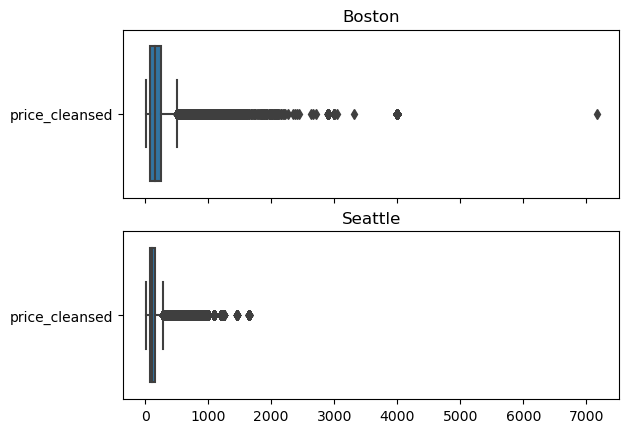

In [77]:
# create the subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# create 1st 
sns.boxplot(bos_calendar[bos_calendar.price_cleansed.notnull()][['price_cleansed']], ax=ax1, orient='h')
ax1.set_title('Boston')

# create the second subplot and plot the second DataFrame
sns.boxplot(sea_calendar[sea_calendar.price_cleansed.notnull()][['price_cleansed']], ax=ax2, orient='h')
ax2.set_title('Seattle')

# display the plot
plt.show()

In [78]:
# from mean, median and plot, we can see seattle is cheaper than boston, but this might caused by month diff

In [78]:
bos_calendar[(bos_calendar.price_cleansed.notnull())&
                         (bos_calendar.year == 2016)&
                        (bos_calendar.month > 9)].describe()

,listing_id,price_cleansed,year,month,day
count,1.662300e+05,166230.0,166230.0,166230.000000,166230.000000
mean,8.161924e+06,207.637779,2016.0,11.088143,16.136161
std,4.688330e+06,171.486983,0.0,0.798736,8.916591
min,3.353000e+03,20.0,2016.0,10.000000,1.000000
25%,4.223387e+06,90.0,2016.0,10.000000,8.000000
50%,8.310807e+06,165.0,2016.0,11.000000,16.000000
75%,1.260473e+07,279.0,2016.0,12.000000,24.000000
max,1.493346e+07,7163.0,2016.0,12.000000,31.000000


In [79]:
sea_calendar[(sea_calendar.price_cleansed.notnull())&
                         (sea_calendar.year == 2016)&
                         (sea_calendar.month > 9)].describe()

,listing_id,year,month,day,price_cleansed
count,2.512790e+05,251279.0,251279.000000,251279.000000,251279.0
mean,5.361501e+06,2016.0,11.018398,15.895574,136.670975
std,2.955834e+06,0.0,0.821102,8.853649,104.631529
min,3.335000e+03,2016.0,10.000000,1.000000,10.0
25%,2.931922e+06,2016.0,10.000000,8.000000,75.0
50%,5.825701e+06,2016.0,11.000000,16.000000,109.0
75%,7.900056e+06,2016.0,12.000000,24.000000,159.0
max,1.034016e+07,2016.0,12.000000,31.000000,1650.0


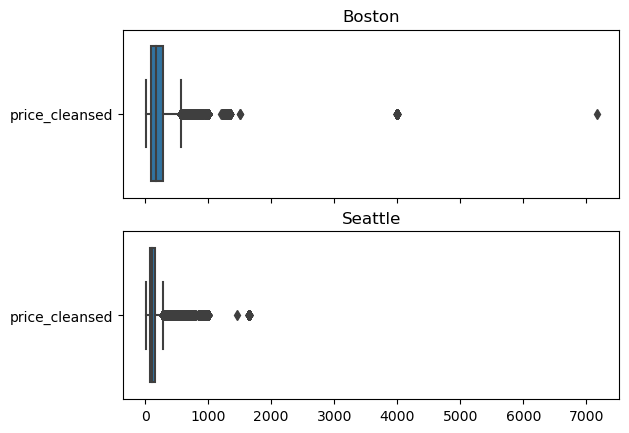

In [83]:
# create the subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# create 1st 
sns.boxplot(bos_calendar[(bos_calendar.price_cleansed.notnull())&
                         (bos_calendar.year == 2016)&
                        (bos_calendar.month > 9)][['price_cleansed']], ax=ax1, orient='h')
ax1.set_title('Boston')

# create the second subplot and plot the second DataFrame
sns.boxplot(sea_calendar[(sea_calendar.price_cleansed.notnull())&
                         (sea_calendar.year == 2016)&
                         (sea_calendar.month > 9)][['price_cleansed']], ax=ax2, orient='h')
ax2.set_title('Seattle')

# display the plot
plt.show()

In [85]:
# narrow down to overlap months in 2016 Oct - Dec, same conclusion can be drawn, 
# price diff even higher between two cities

In [86]:
bos_calendar.groupby(['year','month'])['price'].describe()

count        mean         std   min    25%    50%    75%     max
year month                                                                    
2016 9      24401.0  252.677308  193.495074  22.0  100.0  209.0  375.0  4000.0
     10     46345.0  233.416248  185.672621  20.0   95.0  185.0  329.0  7163.0
     11     58888.0  202.924416  167.079498  20.0   90.0  160.0  270.0  4000.0
     12     60997.0  192.601915  162.010643  20.0   90.0  155.0  250.0  4000.0
2017 1      63181.0  182.799671  155.362723  20.0   85.0  150.0  240.0  4000.0
     2      56810.0  180.961028  160.768760  20.0   85.0  150.0  239.0  4000.0
     3      55181.0  181.818742  168.955611  20.0   85.0  149.0  239.0  4000.0
     4      51382.0  197.252890  191.834132  20.0   83.0  150.0  250.0  4000.0
     5      53600.0  193.712295  184.614451  11.0   80.0  150.0  250.0  4000.0
     6      52731.0  196.535302  184.482541  11.0   83.0  150.0  250.0  4000.0
     7      54963.0  202.486309  198.128376  20.0   83.0  150.0  250.0  4000.0
     8      55561.0  203.330142  206.042823  20.0   83.0  150.0  250.0  4000.0
     9       8997.0  194.658331  191.758847  20.0   82.0  150.0  250.0  4000.0

In [87]:
sea_calendar.groupby(['year','month'])['price'].describe()

count        mean         std   min   25%    50%    75%     max
year month                                                                   
2016 1      59239.0  121.568409   86.900024  12.0  70.0   99.0  145.0  1000.0
     2      73321.0  124.293927   91.550076  20.0  72.0  100.0  149.0  1000.0
     3      83938.0  128.644488   94.371410  20.0  75.0  100.0  150.0  1099.0
     4      76037.0  135.097005   98.232098  20.0  75.0  110.0  160.0  1099.0
     5      79971.0  139.538183  102.863280  20.0  75.0  110.0  169.0  1099.0
     6      77244.0  147.473137  112.481803  20.0  76.0  110.0  175.0  1099.0
     7      74222.0  152.094150  120.078098  20.0  75.0  115.0  180.0  1240.0
     8      76347.0  150.656594  118.754189  20.0  75.0  114.0  179.0  1250.0
     9      77246.0  143.255949  108.804290  20.0  75.0  110.0  175.0  1450.0
     10     82438.0  137.031939  104.491505  20.0  75.0  109.0  160.0  1650.0
     11     81780.0  135.688738  104.264654  10.0  75.0  106.0  155.0  1650.0
     12     87061.0  137.251835  105.101659  20.0  75.0  109.0  160.0  1650.0
2017 1       5698.0  136.882590  104.681152  20.0  75.0  105.0  159.0  1000.0

In [88]:
## seems like Seattle's prime time in July and Aug, Boston in Sep and Oct, in terms of airbnb listing price

### Data Understanding - Listings

In [84]:
bos_listing.shape

(3585, 95)

In [85]:
sea_listing.shape

(3818, 92)

In [86]:
# columns in boston dataset but not in sea dataset
for i, col in enumerate(bos_listing.columns):
    if col not in sea_listing.columns:
        print(col)

access
interaction
house_rules


In [87]:
bos_listing.columns[bos_listing.isnull().sum() == 0]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood_cleansed', 'state', 'smart_location',
       'country_code', 'country', 'latitude', 'longitude', 'is_location_exact',
       'room_type', 'accommodates', 'bed_type', 'amenities', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculat

In [88]:
bos_listing.columns[bos_listing.isnull().sum() == 0].shape

(51,)

In [89]:
sea_listing.columns[sea_listing.isnull().sum() == 0].shape

(47,)

In [90]:
# data quality looks good, over 50% columns don't have missing values

In [91]:
def missingColumns(df, val):
    '''
    return column names with missing value percentage >= @val
    '''
    return list(df.columns[df.isnull().sum() / df.shape[0] >= val])

bos_over50pct_missing = missingColumns(bos_listing, 0.5)
sea_over50pct_missing = missingColumns(sea_listing, 0.5)

In [93]:
bos_over50pct_missing

['notes',
 'neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'has_availability',
 'license',
 'jurisdiction_names']

In [94]:
sea_over50pct_missing

['square_feet', 'monthly_price', 'security_deposit', 'license']

In [109]:
bos_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [98]:
# for neighorhood information, candidate columns are
bos_listing.columns[bos_listing.columns.str.contains('neighbourhood')]

Index(['host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed'],
      dtype='object')

In [99]:
# In bostong listing, 'neighbourhood_group_cleansed' has more than 50% missing values, can't be used

<Axes: >

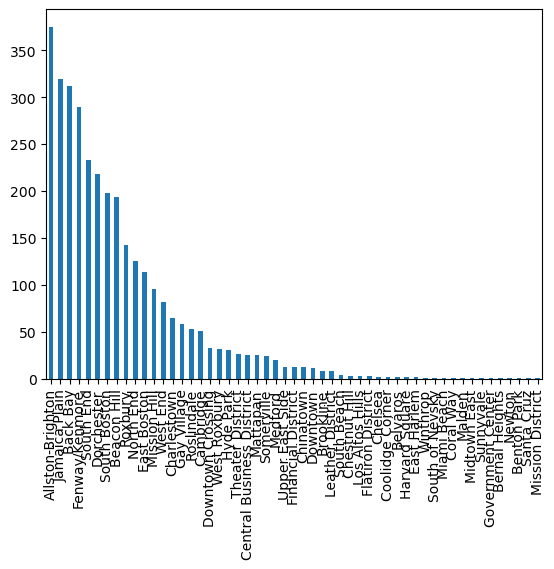

In [101]:
bos_listing.host_neighbourhood.value_counts().plot(kind='bar')

<Axes: >

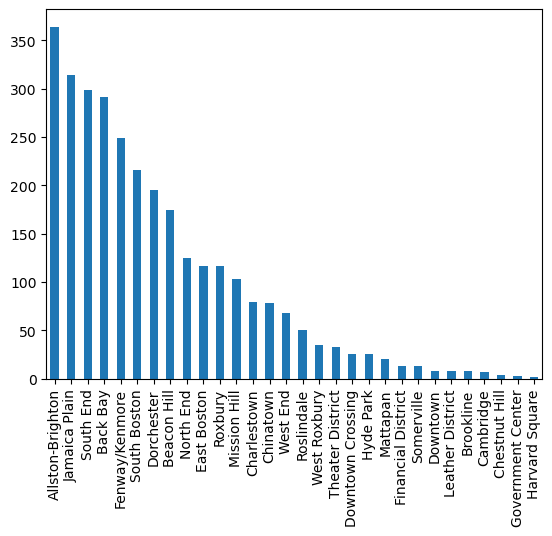

In [102]:
bos_listing.neighbourhood.value_counts().plot(kind='bar')

<Axes: >

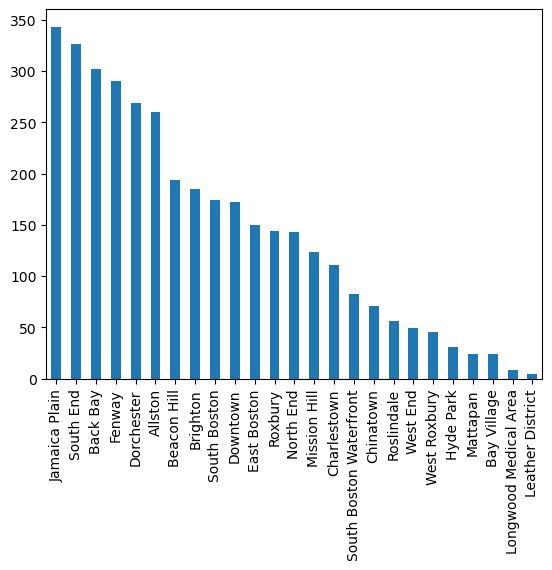

In [103]:
bos_listing.neighbourhood_cleansed.value_counts().plot(kind='bar')

In [116]:
# check missing value percentage
bos_listing[['host_neighbourhood','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed']].isnull().sum() / bos_listing.shape[0]

host_neighbourhood              0.094561
neighbourhood                   0.151464
neighbourhood_cleansed          0.000000
neighbourhood_group_cleansed    1.000000
dtype: float64

In [115]:
# 'neighbourhood_cleansed' is a better column to represent neighbourhood info.
# neighbourhood_group_cleansed all nulls, this column can be ignored in Boston listing

In [117]:
# sample data points, where neighbourhood_cleansed has different value than neighbourhood
bos_listing[bos_listing.neighbourhood == 'Allston-Brighton'][['host_neighbourhood','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed']]

,host_neighbourhood,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
2485,Allston-Brighton,Allston-Brighton,Brighton,NaN
2486,Allston-Brighton,Allston-Brighton,Brighton,NaN
2487,Allston-Brighton,Allston-Brighton,Brighton,NaN
2488,Allston-Brighton,Allston-Brighton,Brighton,NaN
2489,Allston-Brighton,Allston-Brighton,Brighton,NaN
...,...,...,...,...
3530,Allston-Brighton,Allston-Brighton,Allston,NaN
3532,Allston-Brighton,Allston-Brighton,Allston,NaN
3533,Allston-Brighton,Allston-Brighton,Allston,NaN
3534,Allston-Brighton,Allston-Brighton,Allston,NaN


In [118]:
# confirmed neighbourhood is a more clean column, in boston, neighbourhood_cleansed is the best choice

In [119]:
# missing value percentage in seattle
sea_listing[['host_neighbourhood','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed']].isnull().sum() / sea_listing.shape[0]

host_neighbourhood              0.078575
neighbourhood                   0.108958
neighbourhood_cleansed          0.000000
neighbourhood_group_cleansed    0.000000
dtype: float64

In [121]:
sea_listing[['host_neighbourhood','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed']].head()

,host_neighbourhood,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,Queen Anne,Queen Anne,West Queen Anne,Queen Anne
1,Queen Anne,Queen Anne,West Queen Anne,Queen Anne
2,Queen Anne,Queen Anne,West Queen Anne,Queen Anne
3,Queen Anne,Queen Anne,West Queen Anne,Queen Anne
4,Queen Anne,Queen Anne,West Queen Anne,Queen Anne


In [122]:
sea_listing.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [123]:
sea_listing.neighbourhood_cleansed.value_counts()

Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
Pinehurst              4
South Beacon Hill      4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64

In [ ]:
# in Seattle, both [neighbourhood_cleansed] and [neighbourhood_group_cleansed] contain completed data
# [neighbourhood_group_cleansed] seems a higher level of neighbourhood group

In [124]:
seattle_neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OBJECTID          94 non-null     int64   
 1   L_HOOD            94 non-null     object  
 2   S_HOOD            94 non-null     object  
 3   S_HOOD_ALT_NAMES  39 non-null     object  
 4   Shape__Area       94 non-null     float64 
 5   Shape__Length     94 non-null     float64 
 6   geometry          94 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 5.3+ KB


In [125]:
seattle_neighborhoods.L_HOOD.value_counts()

West Seattle           8
Northeast              8
Downtown               8
Delridge               6
Central Area           6
Rainier Valley         6
Ballard                5
Northwest              5
Lake City              5
Capitol Hill           5
Greater Duwamish       5
North Central          4
Beacon Hill            4
Queen Anne             4
Northgate              4
Magnolia               3
Cascade                3
University District    3
Interbay               1
Seward Park            1
Name: L_HOOD, dtype: int64

In [126]:
seattle_neighborhoods.S_HOOD.value_counts()

Loyal Heights            1
Rainier View             1
Seward Park              1
Roxhill                  1
South Delridge           1
                        ..
Leschi                   1
Minor                    1
Harrison/Denny-Blaine    1
Madrona                  1
Industrial District      1
Name: S_HOOD, Length: 94, dtype: int64

In [127]:
# Seattle, [neighbourhood_cleansed] aligns with S_HOOD
# and [neighbourhood_group_cleansed] aligns with L_HOOD, which is district

In [128]:
boston_neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         26 non-null     int64   
 1   Name             26 non-null     object  
 2   Acres            26 non-null     float64 
 3   Neighborhood_ID  26 non-null     object  
 4   SqMiles          26 non-null     float64 
 5   ShapeSTArea      26 non-null     float64 
 6   ShapeSTLength    26 non-null     float64 
 7   geometry         26 non-null     geometry
dtypes: float64(4), geometry(1), int64(1), object(2)
memory usage: 1.8+ KB


In [129]:
boston_neighborhoods.head()

,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,geometry
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,"MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ..."
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,"POLYGON ((-71.10499 42.32610, -71.10503 42.326..."
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((-71.09043 42.33577, -71.09050 42.335..."
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,"POLYGON ((-71.09811 42.33673, -71.09832 42.337..."
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,"POLYGON ((-71.06663 42.34878, -71.06663 42.348..."


In [130]:
# Boston [neighbourhood_cleansed] aligns with 'Name' column

### Info might be helpful to describe a neighborhood's vibe:
1. number of listings
2. property_type of listings
3. price (avg, median)
4. availability (30, 60, 90, etc) - indicates popularity
5. number of reviews (total, per month)
6. review score ratings

In [133]:
# check missing value percentage
bos_listing[['property_type',
             'price',
             'availability_30',
            'availability_60',
             'availability_90',
            'availability_365',
            'number_of_reviews',
            'review_scores_rating',
            'reviews_per_month']].isnull().sum() / bos_listing.shape[0]

property_type           0.000837
price                   0.000000
availability_30         0.000000
availability_60         0.000000
availability_90         0.000000
availability_365        0.000000
number_of_reviews       0.000000
review_scores_rating    0.226778
reviews_per_month       0.210879
dtype: float64

In [134]:
# check missing value percentage
sea_listing[['property_type',
             'price',
             'availability_30',
            'availability_60',
             'availability_90',
            'availability_365',
            'number_of_reviews',
            'review_scores_rating',
            'reviews_per_month']].isnull().sum() / sea_listing.shape[0]

property_type           0.000262
price                   0.000000
availability_30         0.000000
availability_60         0.000000
availability_90         0.000000
availability_365        0.000000
number_of_reviews       0.000000
review_scores_rating    0.169460
reviews_per_month       0.164222
dtype: float64

In [35]:
sea_listing[sea_listing.reviews_per_month.isnull()]['number_of_reviews'].sum()

0

In [36]:
bos_listing[bos_listing.reviews_per_month.isnull()]['number_of_reviews'].sum()

0

In [135]:
# property_type has vey few missing values, which could be filled with mode when doing price prediction
# leave them as null when doing the neighborhood analysis
# review_socres_rating leave null, since no good way to fill the missing values 
# reviews_per_month can fill missing values with 0

In [136]:
sea_listing.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [137]:
bos_listing.property_type.value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [138]:
# group Apartment and Condominium
# group House and Townhouse
# group rest to other (including missing values)
def group_property_type(df):
    df['apt'] = df.property_type.isin(['Apartment','Condominium'])
    df['house'] = df.property_type.isin(['House','Townhouse'])
    df['other'] = ~df.property_type.isin(['Apartment','Condominium','House','Townhouse'])

In [177]:
def get_neighborhood(df, group_neighbor):
    # clean
    group_property_type(df)
    df['price_cleansed'] = df.price.apply(priceClean)
    df['review_score_total'] = df['number_of_reviews'] * df['review_scores_rating']
    df['review_scores_location_total'] = df['number_of_reviews'] * df['review_scores_location']
    # group
    res = df.groupby(group_neighbor).agg({'id':'count',
                                           'apt':'sum',
                                           'house':'sum',
                                           'other':'sum',
                                           'price_cleansed':'median',
                                            'availability_30':'sum',
                                             'availability_60':'sum',
                                             'availability_90':'sum',
                                             'availability_365':'sum',
                                             'number_of_reviews':'sum',
                                             'review_score_total':'sum',
                                              'review_scores_location_total':'sum',
                                             'reviews_per_month':'mean'
                                                    }).reset_index()
    res.rename(columns={'id':'number_of_listings'}, inplace=True)
    
    # calculate new metrics
    res['apt_pct'] = res.apt / res.number_of_listings
    res['house_pct'] = res.house / res.number_of_listings
    res['avg_review_score'] = res.review_score_total / res.number_of_reviews
    res['avg_review_location_score'] = res.review_scores_location_total / res.number_of_reviews
    
    availability = ['availability_30','availability_60','availability_90','availability_365']
    
    for i in availability:
        days = int(re.search(r'_(\d+)', i).group(1))
        res[f'total_availability_{days}'] = res['number_of_listings'] * days
        res[f'occupancy_{days}'] = (res[f'total_availability_{days}'] - res[i]) / res[f'total_availability_{days}']
    
    return res

In [178]:
bos_neighborhood = get_neighborhood(bos_listing, 'neighbourhood_cleansed')
sea_neighborhood = get_neighborhood(sea_listing, 'neighbourhood_cleansed')
sea_district = get_neighborhood(sea_listing, 'neighbourhood_group_cleansed')

In [199]:
bos_merged = boston_neighborhoods.merge(bos_neighborhood, left_on='Name', right_on='neighbourhood_cleansed', how='left')
sea_merged = seattle_neighborhoods.merge(sea_neighborhood, left_on='S_HOOD', right_on='neighbourhood_cleansed', how='left')

In [219]:
def plot_neighborhoods(df, neighbor, metric, annotate=True, metric_threshold=None, top=None, color='black'): 
    # create a new figure and axis
    fig, ax = plt.subplots(figsize=(14,10))

    # plot the data
    df.plot(column=metric, cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='grey', legend=True,
           missing_kwds={'color': 'lightgrey'})

    # add labels for each neighborhood
    if annotate:
        if top != None:
            df_label = df.sort_values(metric, ascending=False).head(top)
        else:
            df_label = df
        
        for idx, row in df_label.iterrows():
            # label for text
            plt.annotate(text=row[neighbor], xy=row['geometry'].centroid.coords[0], 
                             ha='center', va='bottom', fontsize=8, color=color)
            # label for metric
            if metric_threshold != None:
                if row[metric] > metric_threshold:
                    plt.annotate(text=row[metric], xy=row['geometry'].centroid.coords[0], 
                                 ha='center',va='top', fontsize=8, color=color)

    # set the title
    title_text = metric.title().replace('_',' ')
    ax.set_title(f'{title_text} in Neighborhoods', fontsize=14)

    # remove the axis
    ax.axis('off')

    # show the plot
    plt.show()

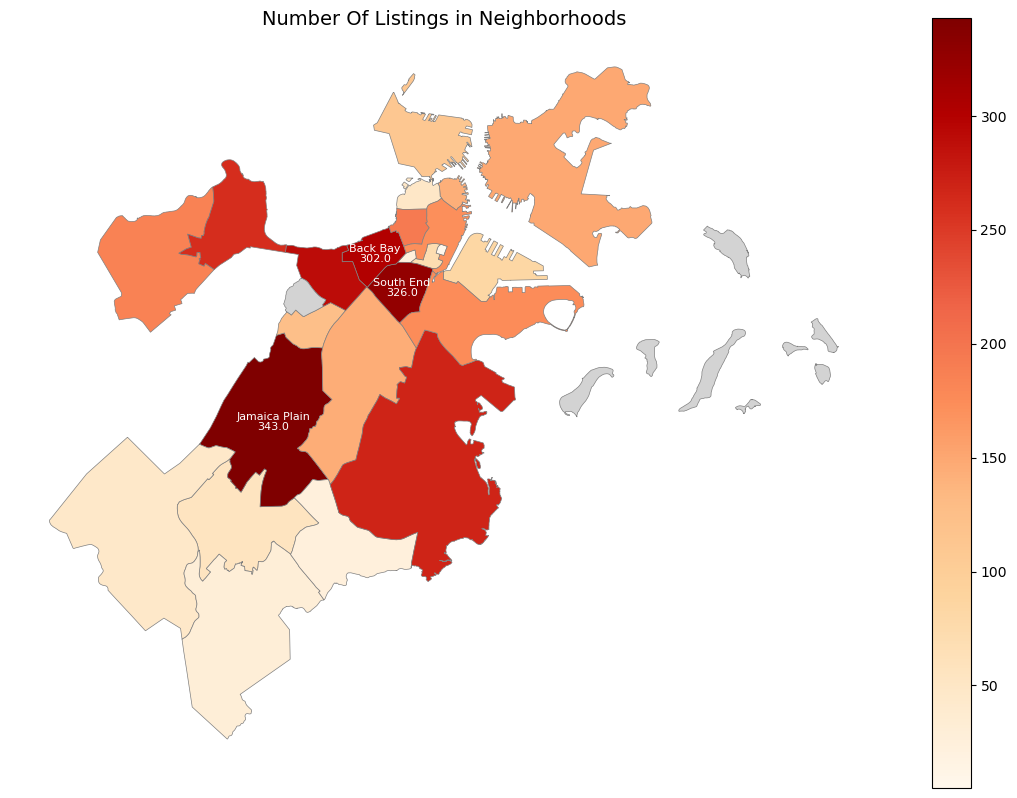

In [220]:
plot_neighborhoods(bos_merged, 'Name', 'number_of_listings', metric_threshold=0, top=3, color='white')

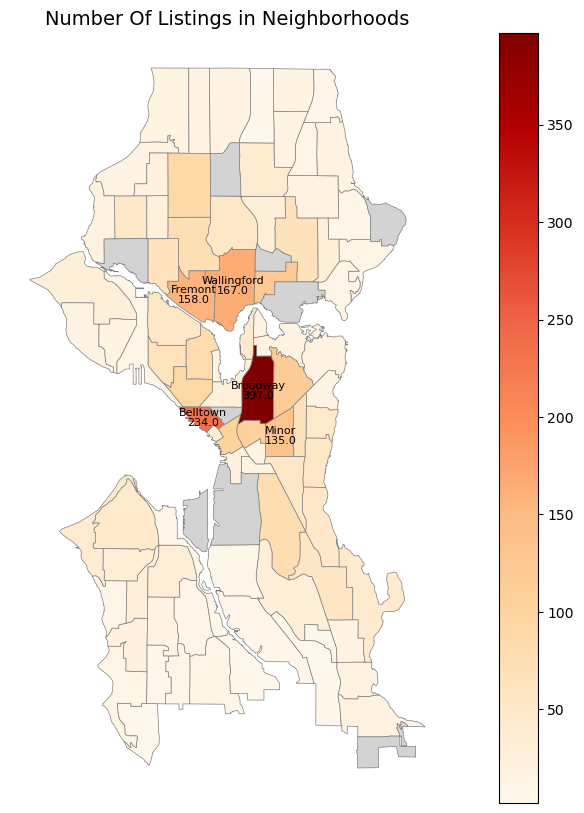

In [221]:
plot_neighborhoods(sea_merged, 'S_HOOD', 'number_of_listings', metric_threshold=0, top=5)

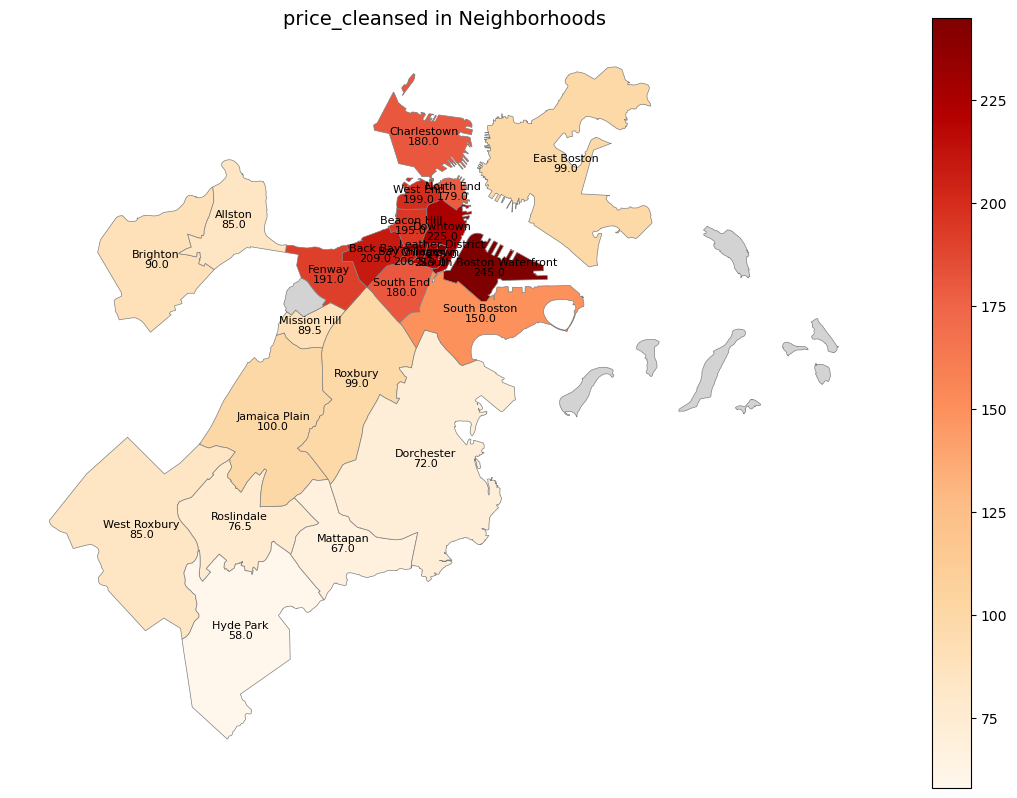

In [291]:
plot_neighborhoods(bos_merged, 'Name', 'price_cleansed')

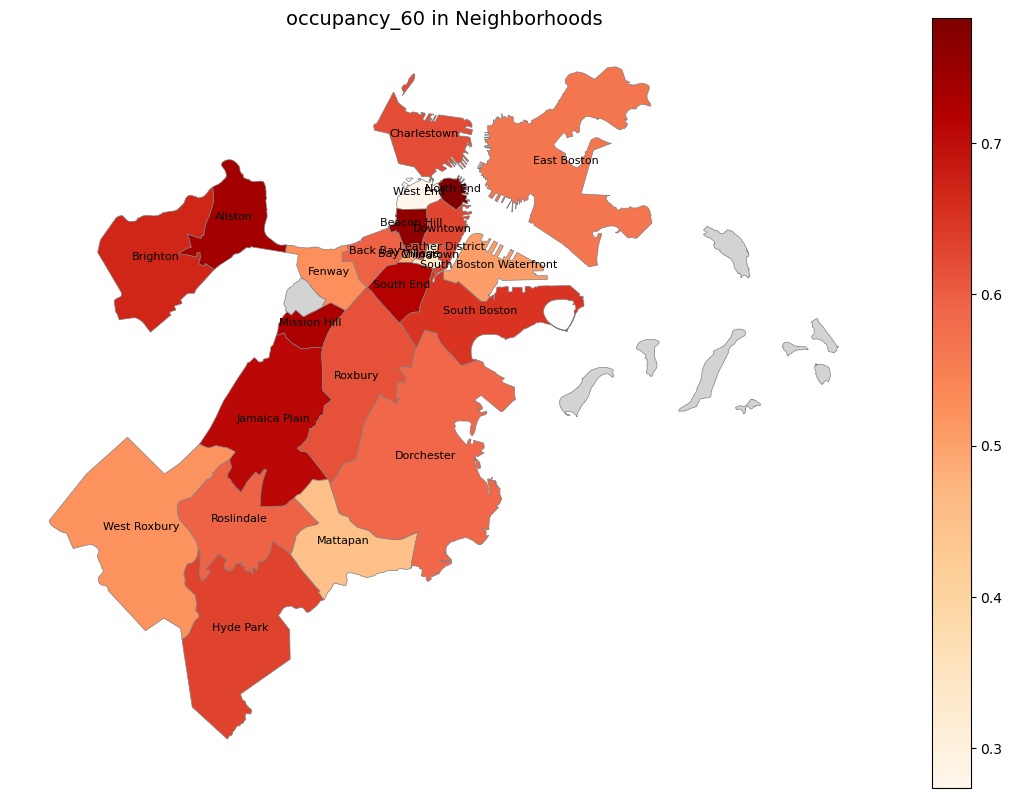

In [275]:
plot_neighborhoods(bos_merged, 'Name', 'occupancy_60')

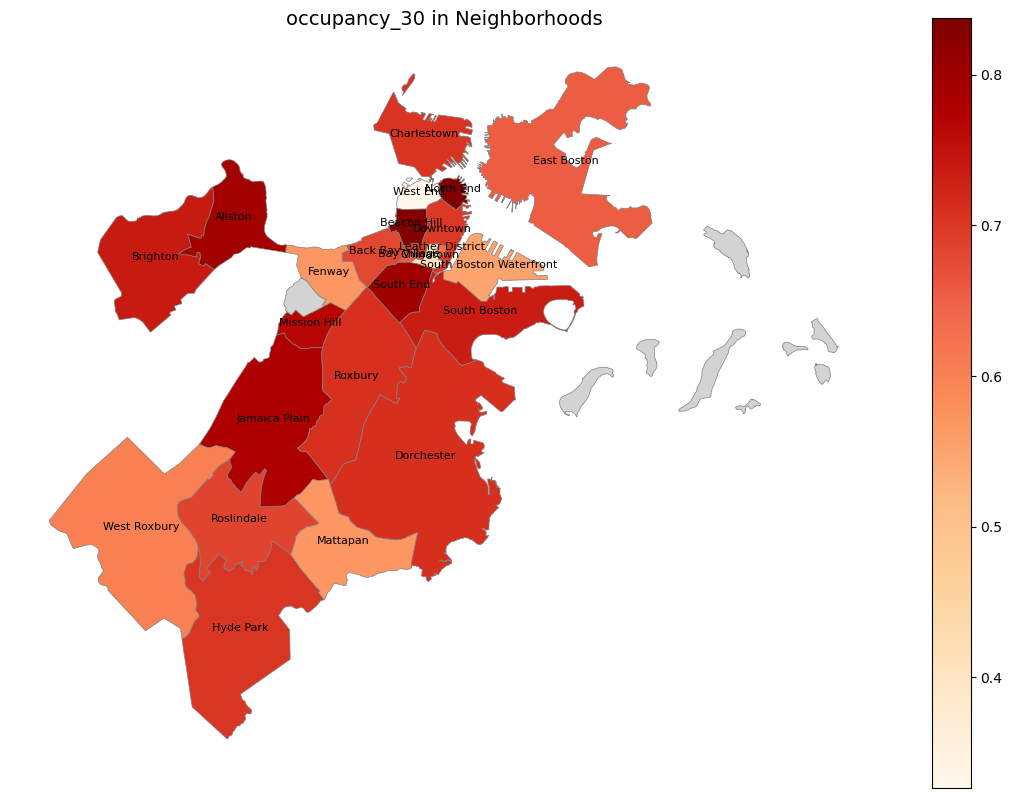

In [274]:
plot_neighborhoods(bos_merged, 'Name', 'occupancy_30')

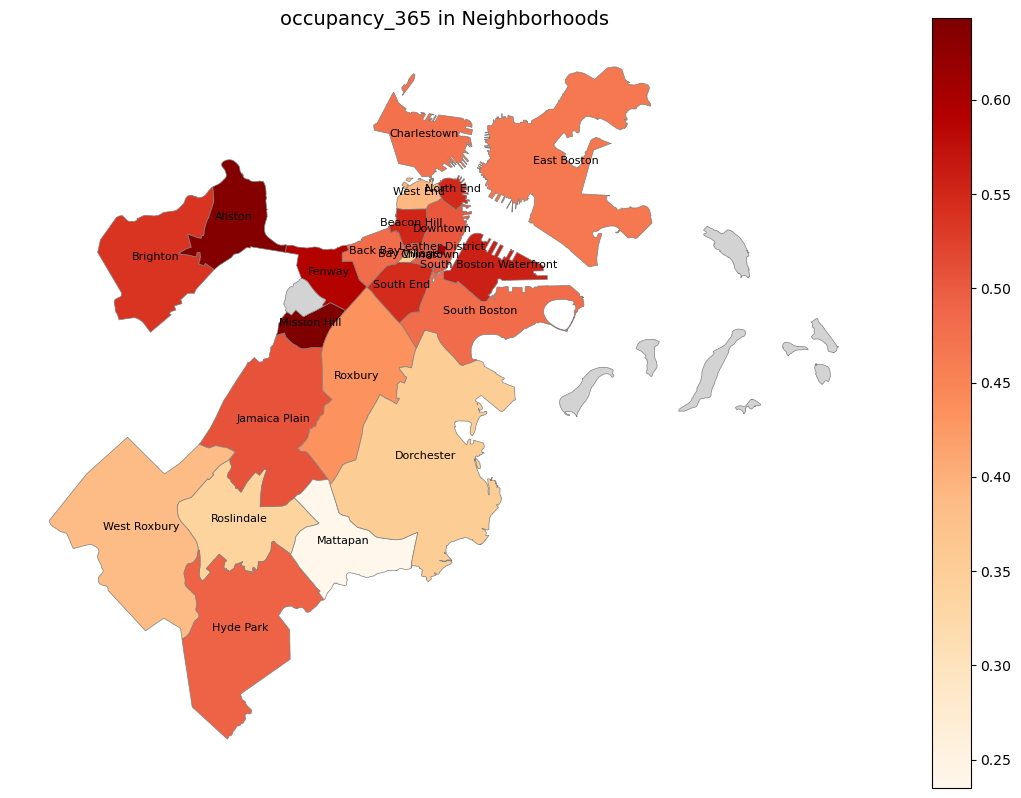

In [270]:
plot_neighborhoods(bos_merged, 'Name', 'occupancy_365')

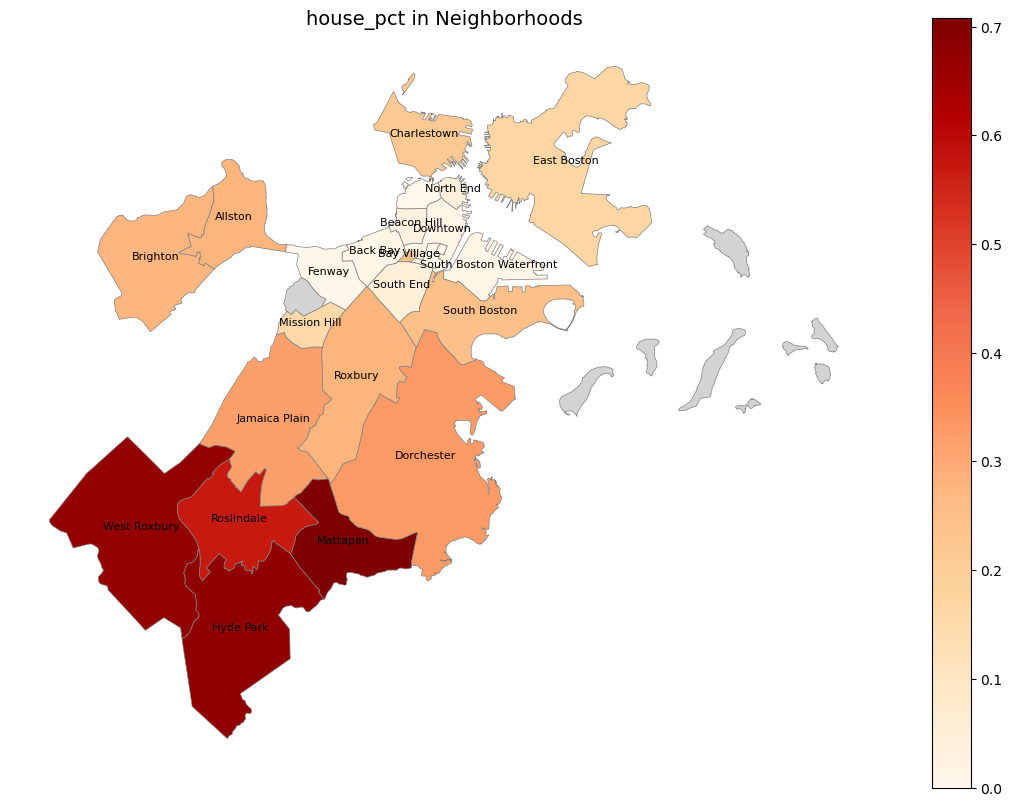

In [278]:
plot_neighborhoods(bos_merged, 'Name', 'house_pct')

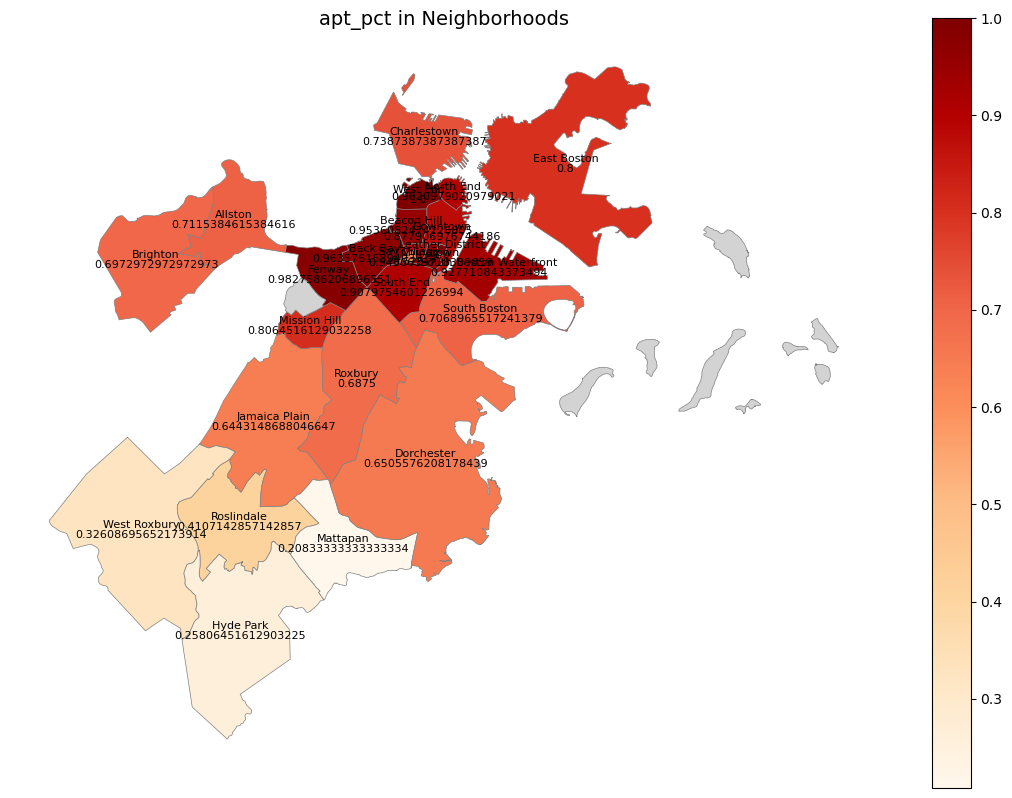

In [293]:
plot_neighborhoods(bos_merged, 'Name', 'apt_pct')

In [294]:
# central boston area contains more apartments, while south 4 neighborhoods have more house listings

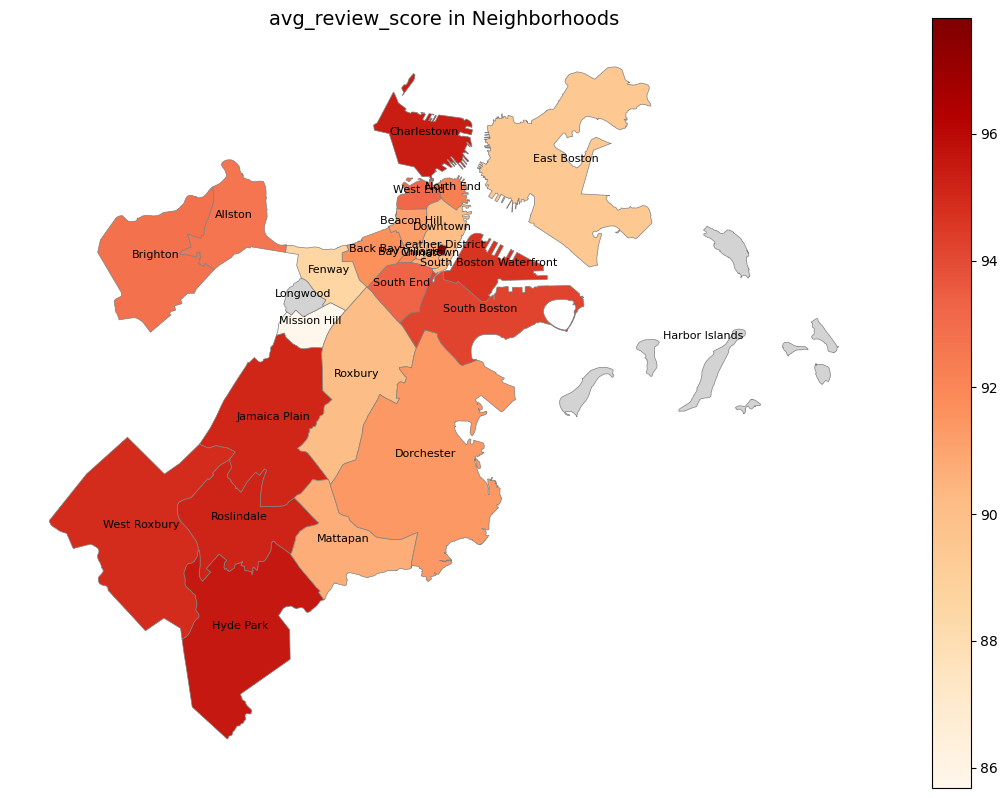

In [349]:
plot_neighborhoods(bos_merged, 'Name', 'avg_review_score', annotate_threshold=100)

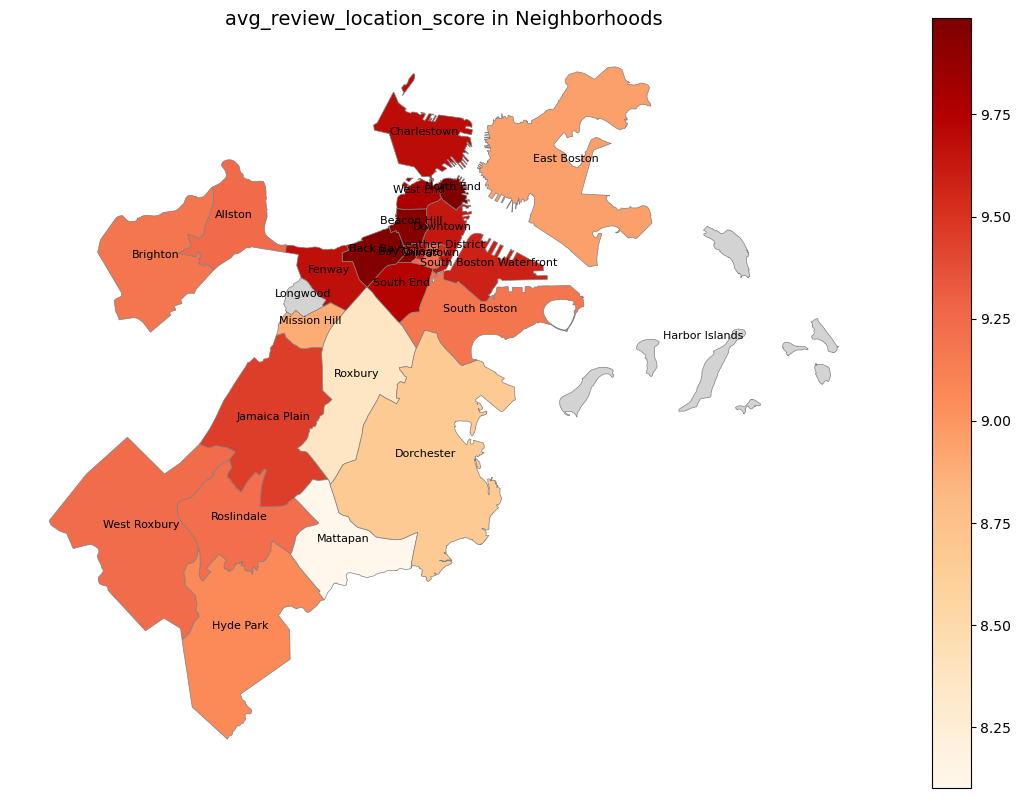

In [351]:
plot_neighborhoods(bos_merged, 'Name', 'avg_review_location_score', annotate_threshold=10)

In [152]:
# neighborhood's price and occupancy trend for future 365 days

In [183]:
calendarClean(bos_calendar)

In [185]:
bos_calendar.rename(columns={'price':'listing_price'}, inplace=True)

In [186]:
bos_trend = bos_listing.merge(bos_calendar, left_on='id', right_on='listing_id', how='left')

In [187]:
bos_trend_year = bos_trend.groupby(['date'])['listing_price'].median().reset_index()

<Axes: xlabel='date'>

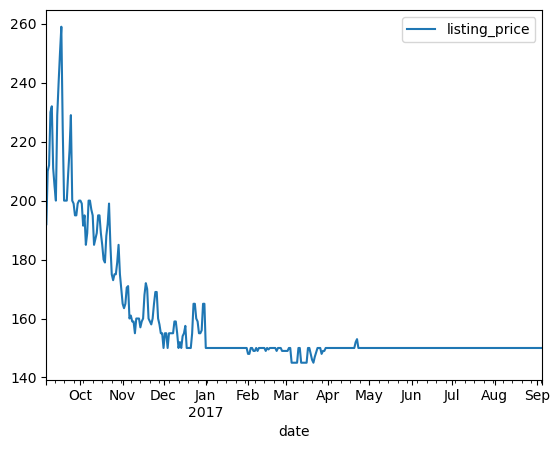

In [168]:
bos_trend_year.plot(x='date')

In [195]:
bos_calendar[bos_calendar.available].listing_price.value_counts()

150     20752
65      17518
75      16249
100     15499
200     14326
        ...  
1875        1
1621        1
1695        1
1924        1
1017        1
Name: listing_price, Length: 1246, dtype: Int64

<Axes: xlabel='date'>

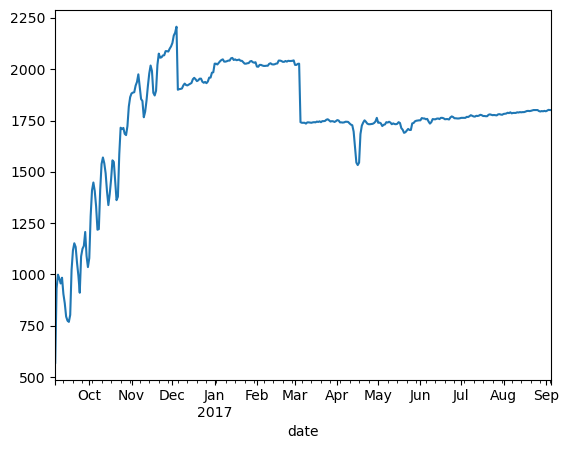

In [188]:
bos_calendar[bos_calendar.available].groupby('date')['listing_price'].count().plot()

<Axes: xlabel='date'>

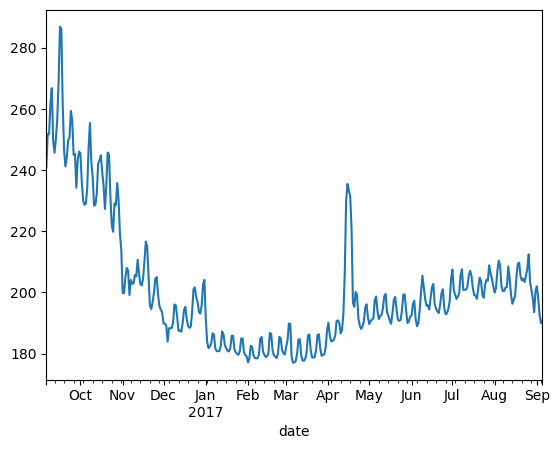

In [190]:
bos_calendar[bos_calendar.available].groupby('date')['listing_price'].mean().plot()

<Axes: xlabel='price_cleansed'>

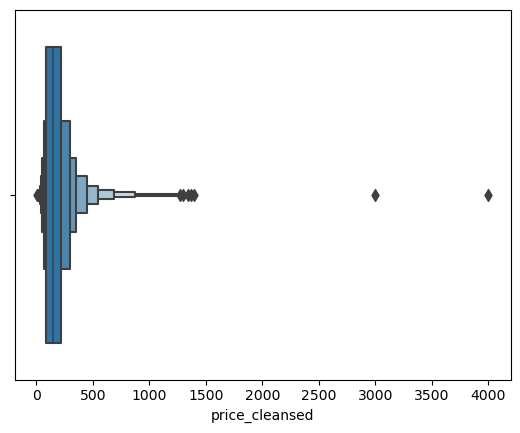

In [202]:
sns.boxenplot(data=bos_listing, x='price_cleansed')

In [204]:
bos_listing.price_cleansed.describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price_cleansed, dtype: float64

<Axes: xlabel='price_cleansed', ylabel='Count'>

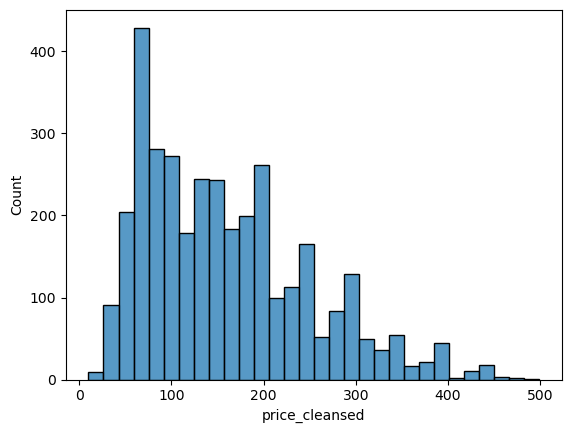

In [206]:
sns.histplot(bos_listing[bos_listing.price_cleansed < 500], x='price_cleansed')

In [207]:
calendarClean(sea_calendar)

<Axes: xlabel='date'>

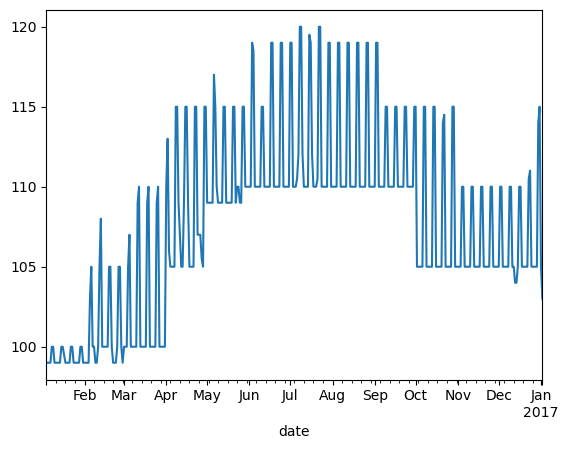

In [213]:
sea_calendar[sea_calendar.available].groupby('date')['price'].median().plot()

<Axes: xlabel='date'>

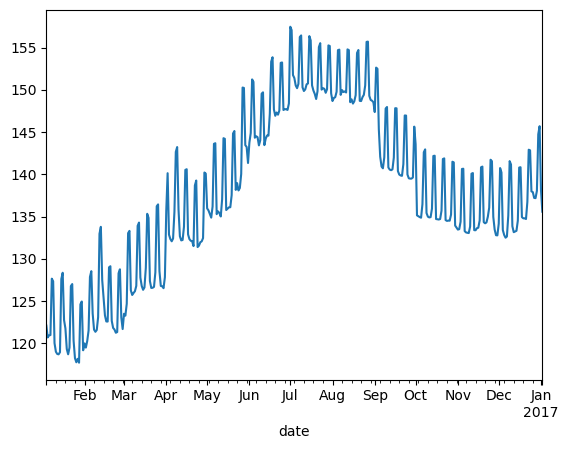

In [214]:
sea_calendar[sea_calendar.available].groupby('date')['price'].mean().plot()

<Axes: xlabel='price_cleansed'>

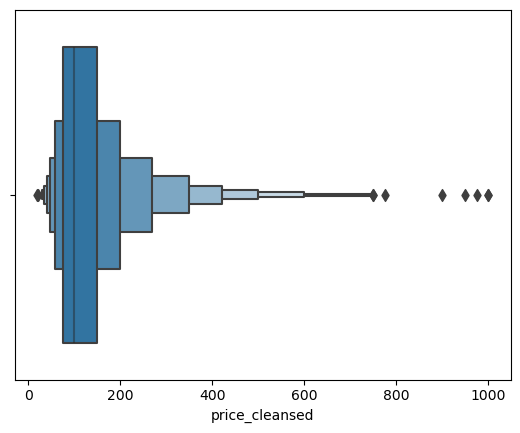

In [215]:
sns.boxenplot(data=sea_listing, x='price_cleansed')

In [216]:
sea_listing.price_cleansed.describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price_cleansed, dtype: float64

In [221]:
sea_occupancy_trend = sea_calendar.groupby('date').agg({'listing_id':'count',
                                                       'available':'sum'}).reset_index()

In [224]:
sea_occupancy_trend['occupancy'] = (sea_occupancy_trend.listing_id - sea_occupancy_trend.available) / sea_occupancy_trend.listing_id

<Axes: xlabel='date'>

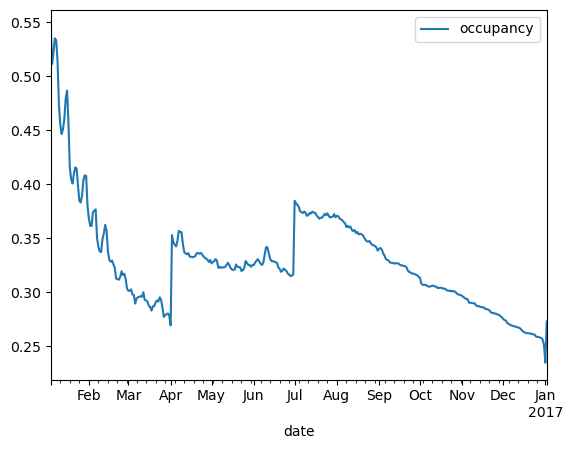

In [226]:
sea_occupancy_trend.plot(x='date',y='occupancy')

In [295]:
# seattle occupancy trend shows starting from Apr more people are booking airbnb listings
# peak probobaly occurs between Jul to Aug/Sep, when weather is good

In [231]:
def occupancy_trend(df):
    df_trend = df.groupby('date').agg({'listing_id':'count',
                                        'available':'sum'}).reset_index()
    df_trend.columns = ['date','number_of_listing', 'available']
    df_trend['occupancy'] = (df_trend['number_of_listing'] - df_trend['available']) / df_trend['number_of_listing']
    return df_trend

In [232]:
bos_occupancy_trend = occupancy_trend(bos_calendar)

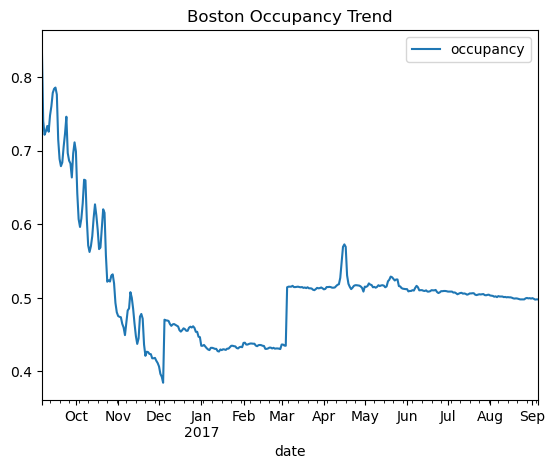

In [237]:
bos_occupancy_trend.plot(x='date', y='occupancy', title='Boston Occupancy Trend');

In [ ]:
# Boston enters peak season early staring March, and stays quite high occupancy all the way to Oct
# there's a weird spike in Apr though

In [ ]:
# April 17 was the day Boston Marathon happened, this could be the reason why placed were booked
# We can take a closer look at the occupancy change in diff areas for that time period

In [301]:
bos_occupancy_trend[bos_occupancy_trend['date'] > '2017-04-10'].head(10)

,date,number_of_listing,available,occupancy
217,2017-04-11,3586,1730,0.517568
218,2017-04-12,3586,1727,0.518405
219,2017-04-13,3586,1696,0.527050
220,2017-04-14,3586,1618,0.548801
221,2017-04-15,3586,1545,0.569158
222,2017-04-16,3586,1533,0.572504
223,2017-04-17,3586,1545,0.569158
224,2017-04-18,3586,1684,0.530396
225,2017-04-19,3586,1725,0.518963
226,2017-04-20,3586,1740,0.514780


In [238]:
def neighborhood_occupancy_trend(df_cal, df_listing, group_neighbor='neighbourhood_cleansed'):
    df_merge = df_listing.merge(df_cal, left_on='id', right_on='listing_id', how='left')
    res = df_merge.groupby(['date',group_neighbor]).agg({'listing_id':'count',
                                        'available':'sum'}).reset_index()
    res.rename(columns={'listing_id':'number_of_listing'}, inplace=True)
    res['occupancy'] = (res['number_of_listing'] - res['available']) / res['number_of_listing']
    return res

In [239]:
bos_neighborhood_occupancy_trend = neighborhood_occupancy_trend(bos_calendar, bos_listing)

In [306]:
def date_group(dt):
    if dt >= pd.to_datetime('2017-04-15') and dt <= pd.to_datetime('2017-04-17'):
        return 'marathon_dates'
    elif dt >= pd.to_datetime('2017-04-01') and dt <= pd.to_datetime('2017-04-07'):
        return 'apr_first_wk'
    else:
        return 'other'

In [308]:
bos_neighborhood_occupancy_trend['date_group'] = bos_neighborhood_occupancy_trend.date.apply(date_group)

In [311]:
bos_grouped = bos_neighborhood_occupancy_trend.groupby(['date_group','neighbourhood_cleansed'])['occupancy'].mean().reset_index()

In [334]:
bos_pivoted = bos_grouped.pivot(index='neighbourhood_cleansed', columns='date_group', values='occupancy')
bos_pivoted['diff'] = round((bos_pivoted.marathon_dates - bos_pivoted.apr_first_wk) * 100,2) 
bos_pivoted = boston_neighborhoods.merge(bos_pivoted, right_on='neighbourhood_cleansed', left_on='Name', how='left')

In [ ]:
# Boston marathon finish line is in Back Bay neighborhood, we can see areas around it all have very high occupancy during marathon dates
# compare to beginning of Apr, central boston area neighborhoods have highest occupancy increase during marathon dates
# note that Fenway area didn't increase over 5%, indicates it's been booked all the way from beginning of April!

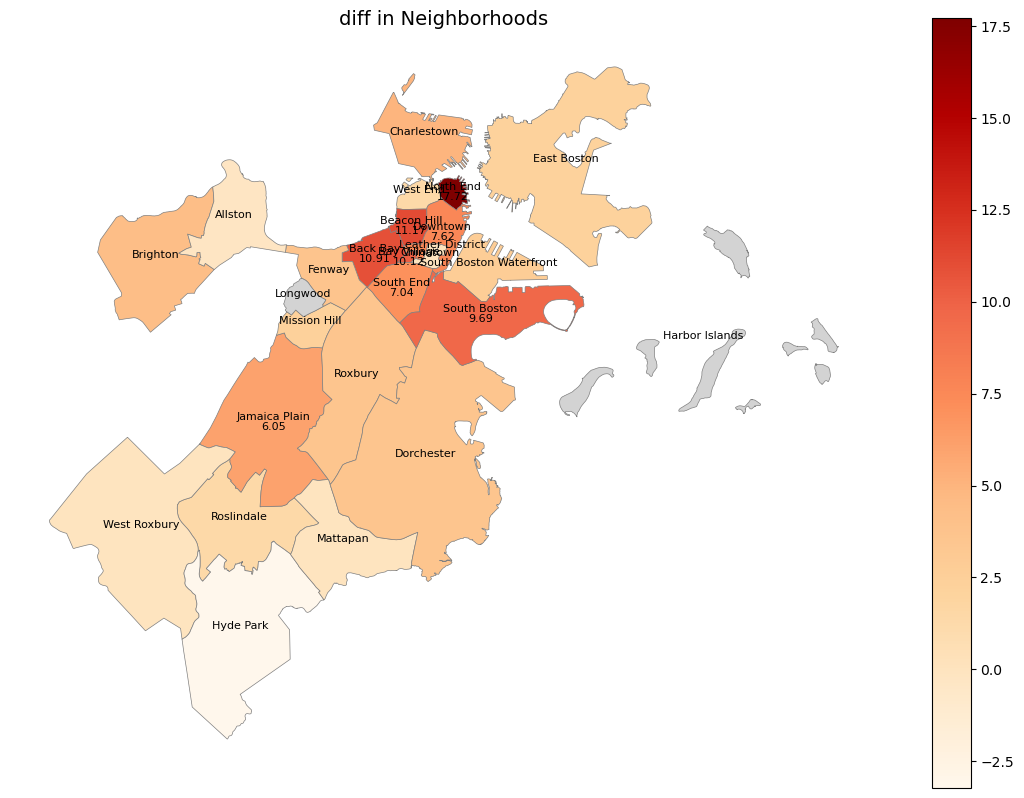

In [344]:
plot_neighborhoods(bos_pivoted, 'Name', 'diff', annotate_threshold=5)

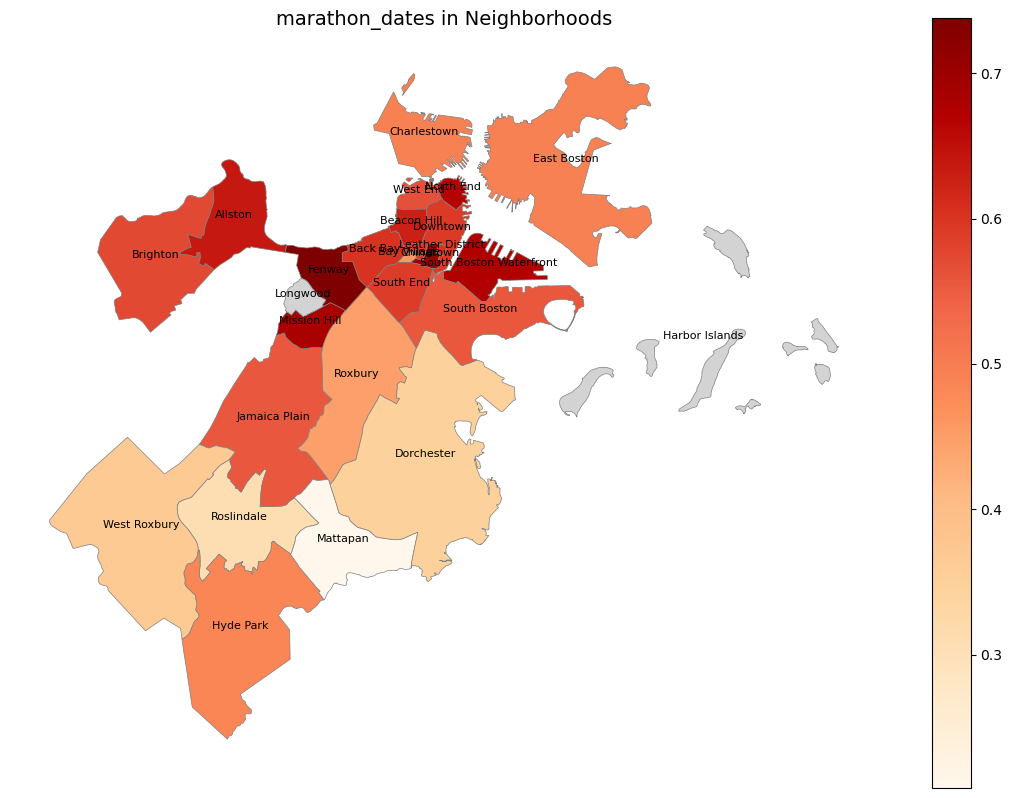

In [347]:
plot_neighborhoods(bos_pivoted, 'Name', 'marathon_dates', annotate_threshold=1)

In [309]:
bos_neighborhood_occupancy_trend.head()

,date,neighbourhood_cleansed,number_of_listing,available,occupancy,month,year,date_group
0,2016-09-06,Allston,260,32,0.876923,9,2016,other
1,2016-09-06,Back Bay,302,55,0.817881,9,2016,other
2,2016-09-06,Bay Village,24,5,0.791667,9,2016,other
3,2016-09-06,Beacon Hill,194,28,0.855670,9,2016,other
4,2016-09-06,Brighton,185,21,0.886486,9,2016,other


<Axes: xlabel='date', ylabel='occupancy'>

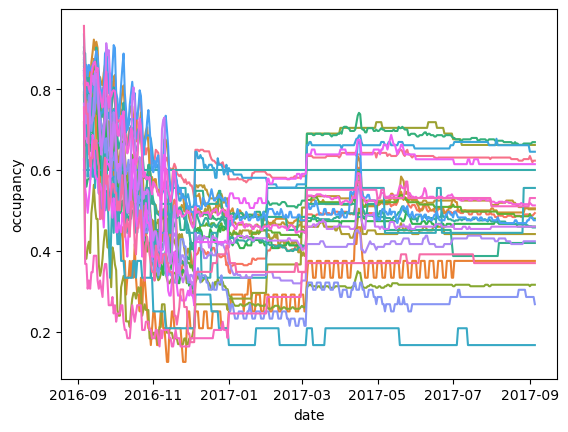

In [255]:
sns.lineplot(bos_neighborhood_occupancy_trend, x='date', y='occupancy', hue='neighbourhood_cleansed', legend=False)

In [257]:
# we can see neighborhood occupancy's variaty becomes larger in further future
# might indicates the popularity of that neighborhood, see who's top and who's bottom 5 after March 2017

In [263]:
bos_neighborhood_occupancy_trend[(bos_neighborhood_occupancy_trend['date'] > '2017-03-01') & 
                                 (bos_neighborhood_occupancy_trend['occupancy'] > 0.6)].neighbourhood_cleansed.value_counts()

Allston                    185
Chinatown                  185
Fenway                     185
Mission Hill               185
South Boston Waterfront    185
North End                    4
Beacon Hill                  3
Back Bay                     1
Downtown                     1
Name: neighbourhood_cleansed, dtype: int64

In [352]:
# these top occupancy neighborhoods aligns with occupancy_365 heatmap

In [246]:
bos_neighborhood_occupancy_trend['month'] = bos_neighborhood_occupancy_trend['date'].dt.month
bos_neighborhood_occupancy_trend['year'] = bos_neighborhood_occupancy_trend['date'].dt.year

In [248]:
bos_neighborhood_occupancy_monthly_trend = bos_neighborhood_occupancy_trend.groupby(['year','month','neighbourhood_cleansed'])['occupancy'].mean().reset_index()

In [249]:
bos_neighborhood_occupancy_monthly_trend['year_month'] = bos_neighborhood_occupancy_monthly_trend['year'] * 100 + bos_neighborhood_occupancy_monthly_trend['month']

In [353]:
# Time to take a look at Seattle neighborhoods

In [355]:
sea_merged = seattle_neighborhoods.merge(sea_neighborhood, left_on='S_HOOD', right_on='neighbourhood_cleansed', how='left')

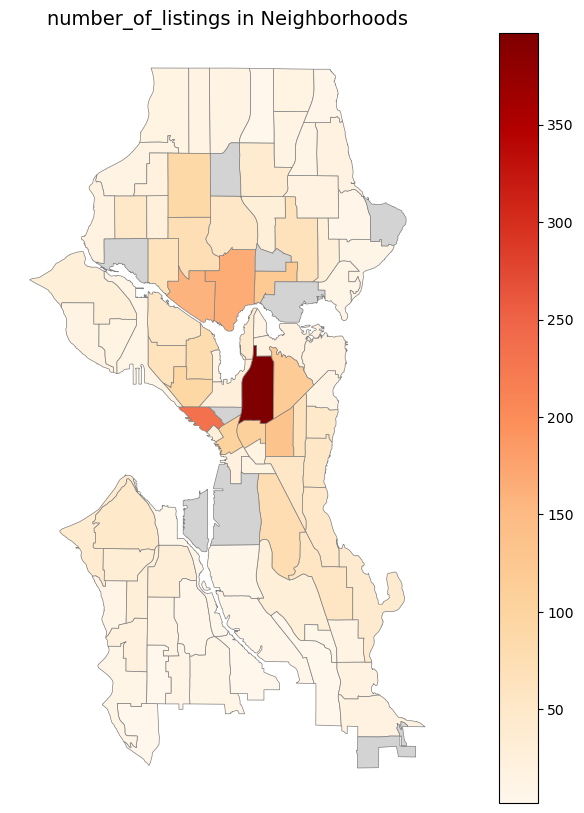

In [362]:
plot_neighborhoods(sea_merged, 'S_HOOD', 'number_of_listings', annotate=False)

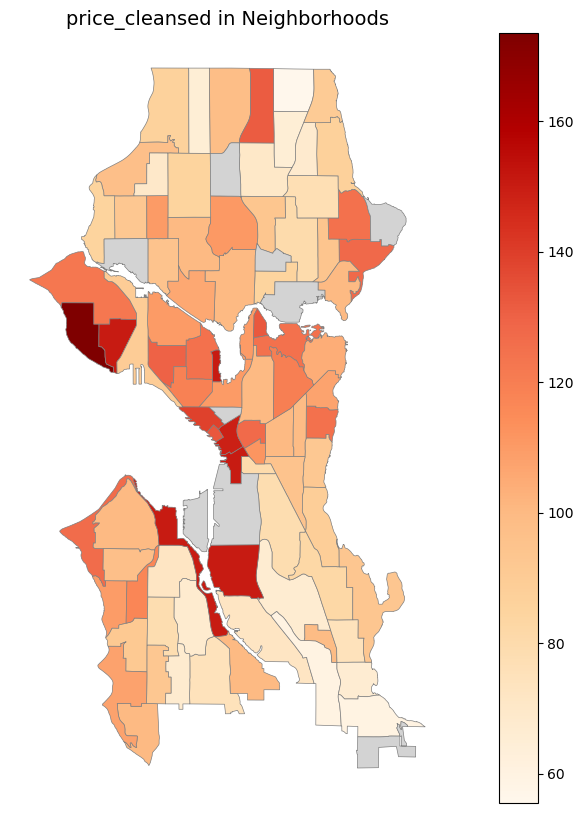

In [363]:
plot_neighborhoods(sea_merged, 'S_HOOD', 'price_cleansed', annotate=False)

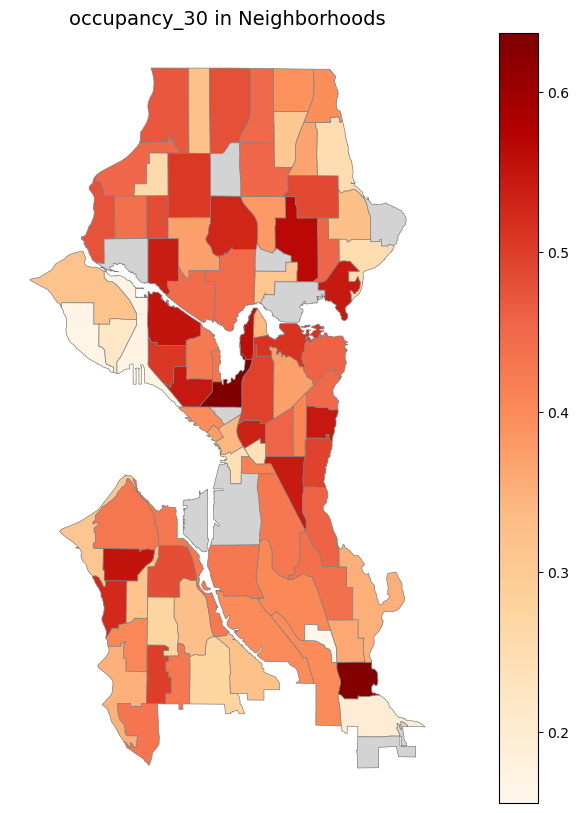

In [364]:
plot_neighborhoods(sea_merged, 'S_HOOD', 'occupancy_30', annotate=False)

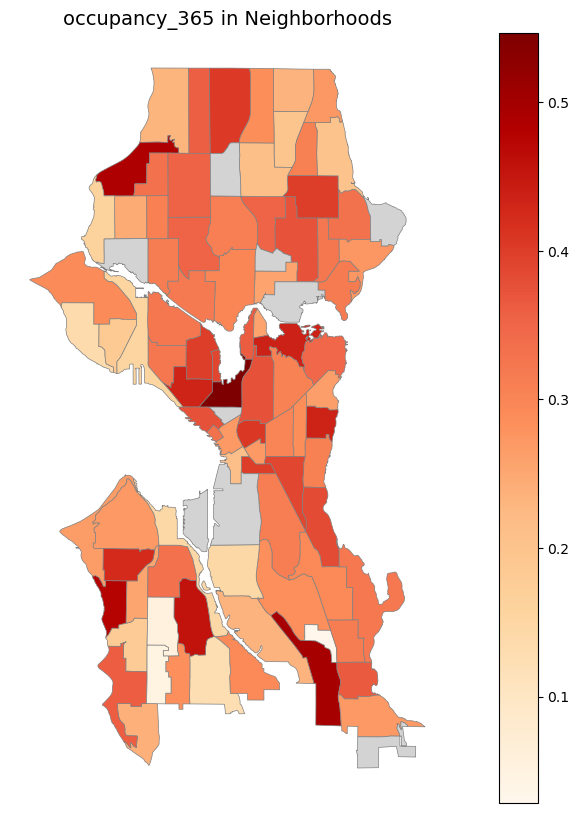

In [365]:
plot_neighborhoods(sea_merged, 'S_HOOD', 'occupancy_365', annotate=False)

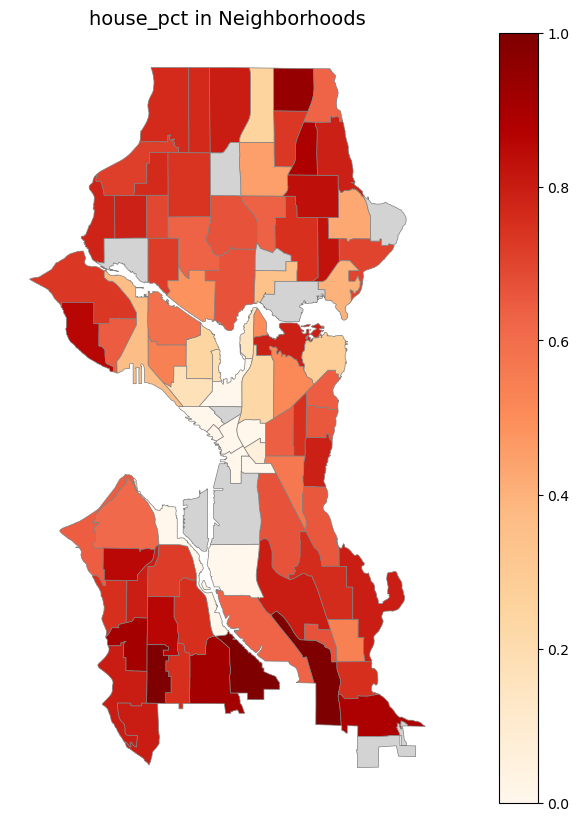

In [366]:
plot_neighborhoods(sea_merged, 'S_HOOD', 'house_pct', annotate=False)

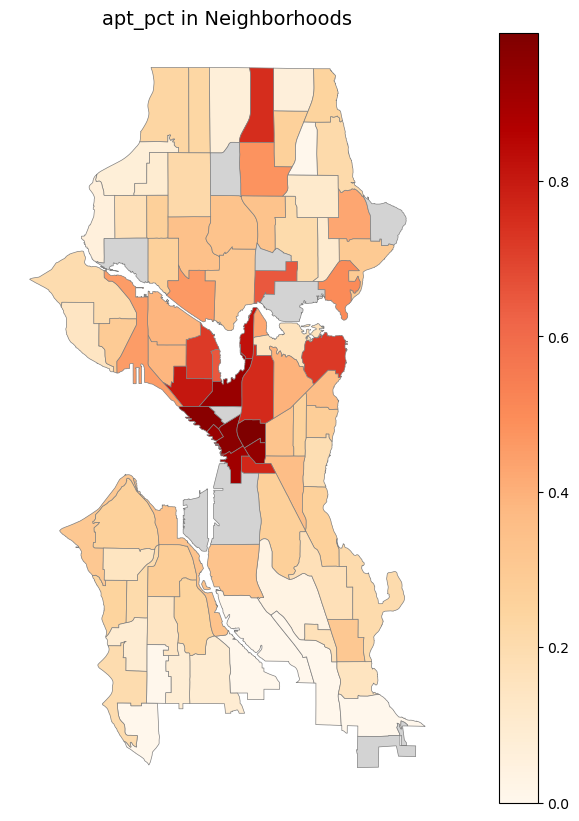

In [367]:
plot_neighborhoods(sea_merged, 'S_HOOD', 'apt_pct', annotate=False)

In [368]:
# The house apt distribution is different from Boston, with more areas supplied with house/townhouse listings

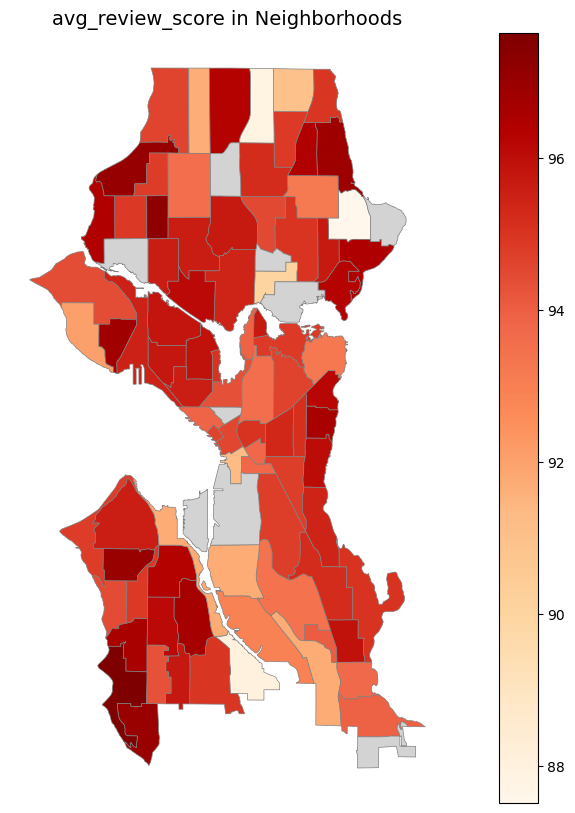

In [369]:
plot_neighborhoods(sea_merged, 'S_HOOD', 'avg_review_score', annotate=False)

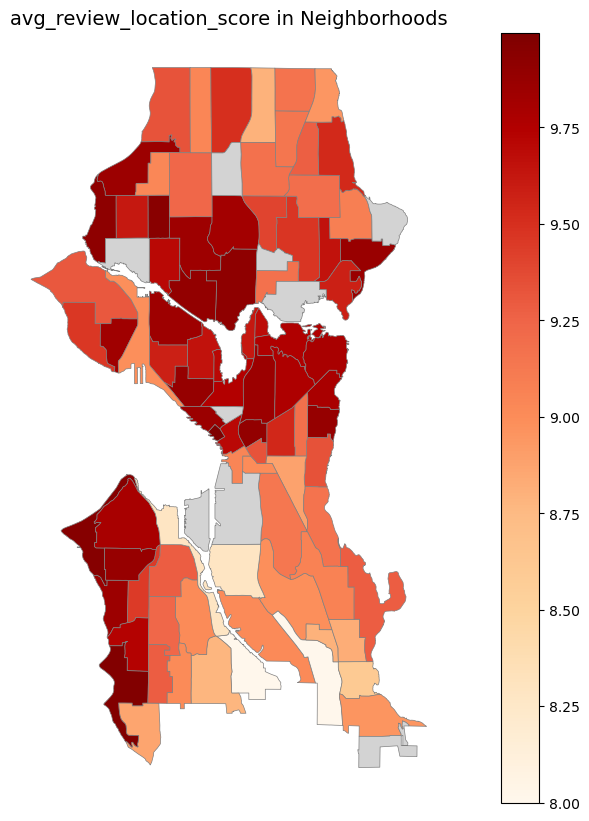

In [370]:
plot_neighborhoods(sea_merged, 'S_HOOD', 'avg_review_location_score', annotate=False)